<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Reinforcement Learning

&copy; Dr Yves J Hilpisch | The Python Quants GmbH

http://aimachine.io | http://twitter.com/dyjh

<img src="https://hilpisch.com/aiif_cover_shadow.png" width="300px" align="left">

## Reinforcement Learning

In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)
os.environ['PYTHONHASHSEED'] = '0'
%config InlineBackend.figure_format = 'svg'

## `CartPole` Environment 

In [2]:
import gym

In [3]:
env = gym.make('CartPole-v1')

C:\Users\zhang\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [4]:
env.action_space.seed(100)

[100]

In [5]:
env.observation_space

Box([-4.8000e+00 -3.4028e+38 -4.1888e-01 -3.4028e+38], [4.8000e+00 3.4028e+38 4.1888e-01 3.4028e+38], (4,), float32)

In [6]:
env.observation_space.low.astype(np.float16)

array([-4.8  ,   -inf, -0.419,   -inf], dtype=float16)

In [7]:
env.observation_space.high.astype(np.float16)

array([4.8  ,   inf, 0.419,   inf], dtype=float16)

In [8]:
state = env.reset(seed=100)

In [9]:
state

array([ 0.0335,  0.0097, -0.0211, -0.0457], dtype=float32)

In [10]:
env.action_space

Discrete(2)

In [11]:
env.action_space.n

2

In [12]:
env.action_space.sample()

1

In [13]:
env.action_space.sample() 

1

In [14]:
a = env.action_space.sample()
a

0

In [15]:
state, reward, done, info = env.step(a)
state, reward, done, info

(array([ 0.0337, -0.1852, -0.022 ,  0.2402], dtype=float32), 1.0, False, {})

In [16]:
env.reset(seed=100)
for e in range(1, 200):
    a = env.action_space.sample()
    state, reward, done, info = env.step(a)
    print(f'step={e:2d} | state={state} | action={a} | reward={reward}')
    if done and (e + 1) < 200:
        print('*** FAILED ***')
        break

step= 1 | state=[ 0.0337  0.2051 -0.022  -0.345 ] | action=1 | reward=1.0
step= 2 | state=[ 0.0378  0.0103 -0.0289 -0.0593] | action=0 | reward=1.0
step= 3 | state=[ 0.038  -0.1844 -0.0301  0.2241] | action=0 | reward=1.0
step= 4 | state=[ 0.0343 -0.3791 -0.0256  0.5071] | action=0 | reward=1.0
step= 5 | state=[ 0.0267 -0.5739 -0.0155  0.7916] | action=0 | reward=1.0
step= 6 | state=[ 0.0153 -0.3785  0.0003  0.4941] | action=1 | reward=1.0
step= 7 | state=[ 0.0077 -0.1834  0.0102  0.2015] | action=1 | reward=1.0
step= 8 | state=[ 0.004   0.0116  0.0143 -0.0879] | action=1 | reward=1.0
step= 9 | state=[ 0.0042  0.2065  0.0125 -0.376 ] | action=1 | reward=1.0
step=10 | state=[ 0.0084  0.0112  0.005  -0.0795] | action=0 | reward=1.0
step=11 | state=[ 0.0086  0.2062  0.0034 -0.3706] | action=1 | reward=1.0
step=12 | state=[ 0.0127  0.4013 -0.004  -0.6622] | action=1 | reward=1.0
step=13 | state=[ 0.0207  0.5965 -0.0173 -0.9561] | action=1 | reward=1.0
step=14 | state=[ 0.0327  0.4016 -0.03

In [17]:
done

True

## Dimensionality Reduction

See http://kvfrans.com/simple-algoritms-for-solving-cartpole/.

In [18]:
np.random.seed(100)

In [19]:
weights = np.random.random(4) * 2 - 1

In [20]:
weights

array([ 0.0868, -0.4433, -0.151 ,  0.6896])

In [21]:
state = env.reset(seed=100)

In [22]:
state

array([ 0.0335,  0.0097, -0.0211, -0.0457], dtype=float32)

In [23]:
s = np.dot(state, weights)
s

-0.029700348968367464

## Action Rule

In [24]:
if s < 0:
    a = 0
else:
    a = 1

In [25]:
a

0

## Total Reward per Episode

In [26]:
def run_episode(env, weights):  
    state = env.reset()
    treward = 0
    for _ in range(200):
        s = np.dot(state, weights)
        a = 0 if s < 0 else 1
        state, reward, done, info = env.step(a)
        treward += reward
        if done:
            break
    return treward

In [27]:
run_episode(env, weights)

76.0

## Simple Learning 

In [28]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

In [29]:
set_seeds()
num_episodes = 1000

In [30]:
besttreward = 0
for e in range(1, num_episodes + 1):
    weights = np.random.rand(4) * 2 - 1
    treward = run_episode(env, weights)
    if treward > besttreward:
        besttreward = treward
        bestweights = weights
        if treward == 200:
            print(f'SUCCESS | episode={e}')
            break
        print(f'UPDATE  | episode={e}')

UPDATE  | episode=1
UPDATE  | episode=2
SUCCESS | episode=13


In [31]:
weights

array([-0.4282,  0.7048,  0.95  ,  0.7697])

## Testing the Results

In [32]:
res = []
for _ in range(100):
    treward = run_episode(env, weights)
    res.append(treward)
res[:10]

[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0]

In [33]:
sum(res) / len(res)

200.0

## `TensorFlow/Keras`

In [34]:
import warnings as w
w.simplefilter('ignore')

In [35]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [36]:
import tensorflow as tf

In [37]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [38]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [39]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    env.action_space.seed(100)

## Q-Learning

See https://keon.io/deep-q-learning/

In [40]:
from collections import deque

In [41]:
class DQLAgent:
    def __init__(self, gamma=0.95, hu=24, opt=keras.optimizers.Adam,
           lr=0.001, finish=False):
        self.finish = finish
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.gamma = gamma
        self.batch_size = 32
        self.max_treward = 0
        self.averages = list()
        self.memory = deque(maxlen=2000)
        self.osn = env.observation_space.shape[0]
        self.model = self._build_model(hu, opt, lr)
        
    def _build_model(self, hu, opt, lr):
        model = Sequential()
        model.add(Dense(hu, input_dim=self.osn,
                        activation='relu'))
        model.add(Dense(hu, activation='relu'))
        model.add(Dense(env.action_space.n, activation='linear'))
        model.compile(loss='mse', optimizer=opt(learning_rate=lr))
        return model
        
    def act(self, state):
        if random.random() <= self.epsilon:
            return env.action_space.sample()
        action = self.model.predict(state)[0]
        return np.argmax(action)
    
    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in batch:
            if not done:
                reward += self.gamma * np.amax(
                    self.model.predict(next_state)[0])
            target = self.model.predict(state)
            target[0, action] = reward
            self.model.fit(state, target, epochs=1,
                           verbose=False)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
    def learn(self, episodes):
        trewards = []
        for e in range(1, episodes + 1):
            state = env.reset()
            state = np.reshape(state, [1, self.osn])
            for _ in range(5000):
                action = self.act(state)
                next_state, reward, done, info = env.step(action)
                next_state = np.reshape(next_state,
                                        [1, self.osn])
                self.memory.append([state, action, reward,
                                     next_state, done])
                state = next_state
                if done:
                    treward = _ + 1
                    trewards.append(treward)
                    av = sum(trewards[-25:]) / 25
                    self.averages.append(av)
                    self.max_treward = max(self.max_treward, treward)
                    templ = 'episode: {:4d}/{} | treward: {:4d} | '
                    templ += 'av: {:6.1f} | max: {:4d}'
                    print(templ.format(e, episodes, treward, av,
                                       self.max_treward), end='\r')
                    break
            if av > 195 and self.finish:
                break
            if len(self.memory) > self.batch_size:
                self.replay()
    def test(self, episodes):
        trewards = []
        for e in range(1, episodes + 1):
            state = env.reset()
            for _ in range(5001):
                state = np.reshape(state, [1, self.osn])
                action = np.argmax(self.model.predict(state)[0])
                next_state, reward, done, info = env.step(action)
                state = next_state
                if done:
                    treward = _ + 1
                    trewards.append(treward)
                    print('episode: {:4d}/{} | treward: {:4d}'
                          .format(e, episodes, treward), end='\r')
                    break
        return trewards

In [42]:
episodes = 1000

In [43]:
set_seeds(100)
agent = DQLAgent(finish=True)

In [44]:
agent.learn(episodes)

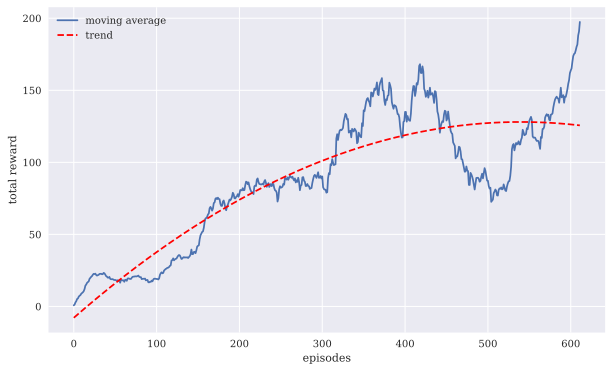

In [45]:
plt.figure(figsize=(10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label='trend')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();

In [46]:
trewards = agent.test(100)

In [47]:
sum(trewards) / len(trewards)

201.74

## Finance Environment

In [48]:
class observation_space:
    def __init__(self, n):
        self.shape = (n,)

In [49]:
class action_space:
    def __init__(self, n):
        self.n = n
    def seed(self, seed):
        random.seed(seed)
    def sample(self):
        return random.randint(0, self.n - 1)

In [50]:
class Finance:
    url = 'https://certificate.tpq.io/eod.csv'
    def __init__(self, symbol, features):
        self.symbol = symbol
        self.features = features
        self.observation_space = observation_space(4)
        self.osn = self.observation_space.shape[0]
        self.action_space = action_space(2)
        self.min_accuracy = 0.475
        self._get_data()
        self._prepare_data()
    def _get_data(self):
        self.raw = pd.read_csv(self.url, index_col=0,
                               parse_dates=True)
    def _prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True)
        self.data = (self.data - self.data.mean()) / self.data.std()
        self.data['d'] = np.where(self.data['r'] > 0, 1, 0)
    def _get_state(self):
        return self.data[self.features].iloc[
            self.bar - self.osn:self.bar].values
    def seed(self, seed=None):
        pass
    def reset(self):
        self.treward = 0
        self.accuracy = 0
        self.bar = self.osn
        state = self.data[self.features].iloc[
            self.bar - self.osn:self.bar]
        return state.values
    def step(self, action):
        correct = action == self.data['d'].iloc[self.bar]
        reward = 1 if correct else 0
        self.treward += reward
        self.bar += 1
        self.accuracy = self.treward / (self.bar - self.osn)
        if self.bar >= len(self.data):
            done = True
        elif reward == 1:
            done = False
        elif (self.accuracy < self.min_accuracy and
              self.bar > self.osn + 10):
            done = True
        else:
            done = False
        state = self._get_state()
        info = {}
        return state, reward, done, info

In [51]:
env = Finance('EUR=', 'r')

In [52]:
env.reset()

array([-1.3678, -1.4405, -1.227 ,  0.5091])

In [53]:
a = env.action_space.sample()
a

1

In [54]:
env.step(a)

(array([-1.4405, -1.227 ,  0.5091,  0.1103]), 1, False, {})

In [55]:
set_seeds(100)
agent = DQLAgent(gamma=0.5, opt=keras.optimizers.RMSprop)

In [56]:
episodes = 300

In [57]:
agent.learn(episodes)

In [58]:
agent.test(3)

[11, 11, 11]

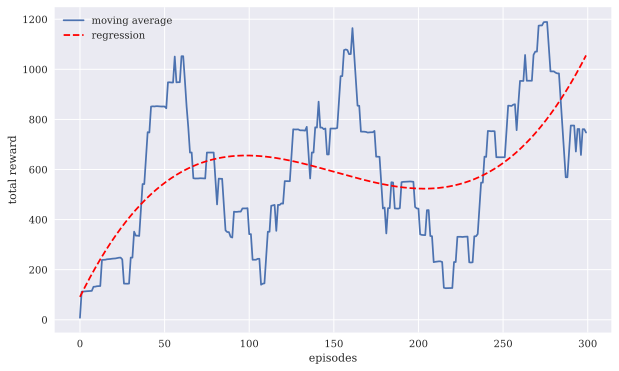

In [59]:
plt.figure(figsize=(10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label='regression')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>